<a href="https://colab.research.google.com/github/PaulToronto/Applied-Geospatial-Data-Science-with-Python---Book/blob/main/2_4_Contextily_Working_With_Local_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextily Working With Local Files

## Imports

In [1]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 31.5 MB/s eta 0:00:00


In [2]:
import contextily as cx
import geopandas as gpd
import rasterio as rio

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

drive_path = '/content/gdrive/MyDrive/Colab Notebooks/Data Science/Applied Geospatial Data Science with Python - Book/data/'

Mounted at /content/gdrive


## Saving tiles locally

### CLIWOC Data

- https://blogs.loc.gov/maps/2023/04/new-interactive-map-visualizes-ship-logbooks-from-the-18th-and-19th-centuries/

- https://figshare.com/articles/dataset/CLIWOC_Slim_and_Routes/11941224

In [33]:
cliwoc = gpd.read_file('https://ndownloader.figshare.com/files/21940242')
#cliwoc = gpd.read_file(drive_path + 'cliwoc_routes.gpkg')
cliwoc

,ID,start,end,records,C1,length_days,geometry
0,1,1827-8-16,1827-11-13,90,NL,89,"LINESTRING (103.10000 -6.92000, 100.47000 -8.2..."
1,2,1807-2-24,1807-4-4,40,UK,39,"LINESTRING (-8.38000 51.38000, -8.02000 51.080..."
2,3,1809-7-4,1809-8-14,42,UK,41,"LINESTRING (-65.35000 19.65000, -65.30000 20.5..."
3,4,1763-11-28,1767-4-12,28,UK,1231,"LINESTRING (-16.15000 32.32000, -15.50000 31.9..."
4,5,1774-5-5,1777-10-23,185,UK,1267,"LINESTRING (-66.70000 41.65000, -63.93000 41.2..."
...,...,...,...,...,...,...,...
1968,2003,1823-11-16,1824-1-23,60,NL,68,"LINESTRING (-68.52000 12.13000, -68.23000 14.5..."
1969,2004,1833-6-26,1833-9-11,73,NL,77,"LINESTRING (0.97000 50.87000, -0.02000 50.5400..."
1970,2005,1841-6-28,1842-1-30,68,NL,216,"LINESTRING (-8.01000 46.37000, -8.19000 45.410..."
1971,2006,1845-12-5,1846-4-15,101,NL,131,"LINESTRING (103.88000 -7.15000, 102.17000 -8.6..."


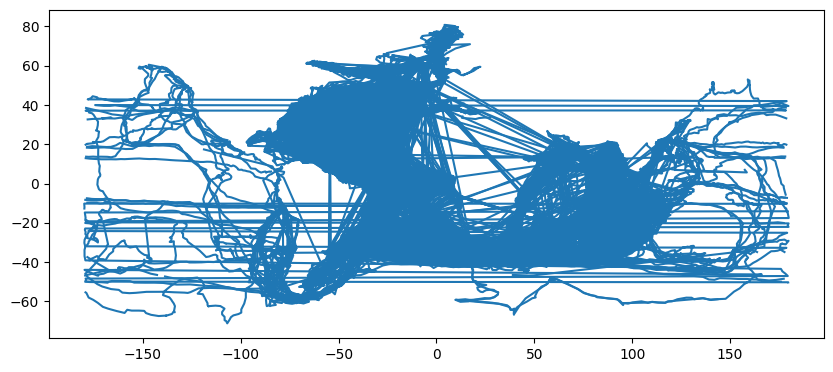

In [34]:
cliwoc.plot(figsize=(10, 10));

In [35]:
cliwoc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

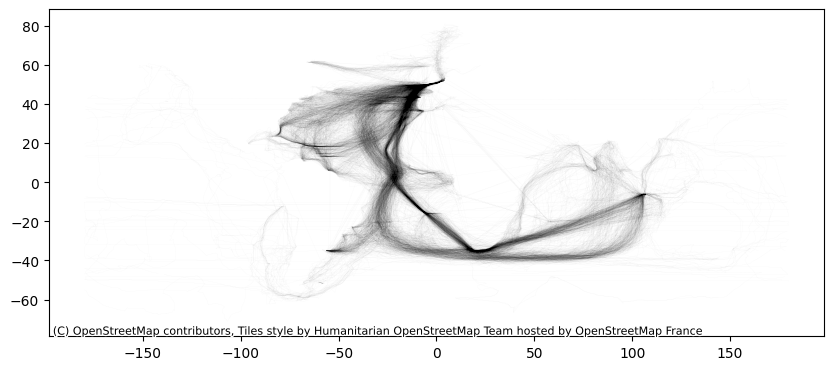

In [43]:
ax = cliwoc.plot(linewidth=0.01, alpha=0.5, color='k', figsize=(10, 10))
cx.add_basemap(ax=ax, crs=cliwoc.crs)